In [18]:
from scipy import ndimage
from scipy import stats
from scipy import io
from sklearn.cluster import KMeans


import numpy as np
import scipy.spatial.distance as dist

import matplotlib
import matplotlib.pyplot as plt
import pandas

from collections import Counter
from sklearn import datasets 
iris = datasets.load_iris()
data = iris.data
data.shape
plt.figure(figsize=(15, 15))

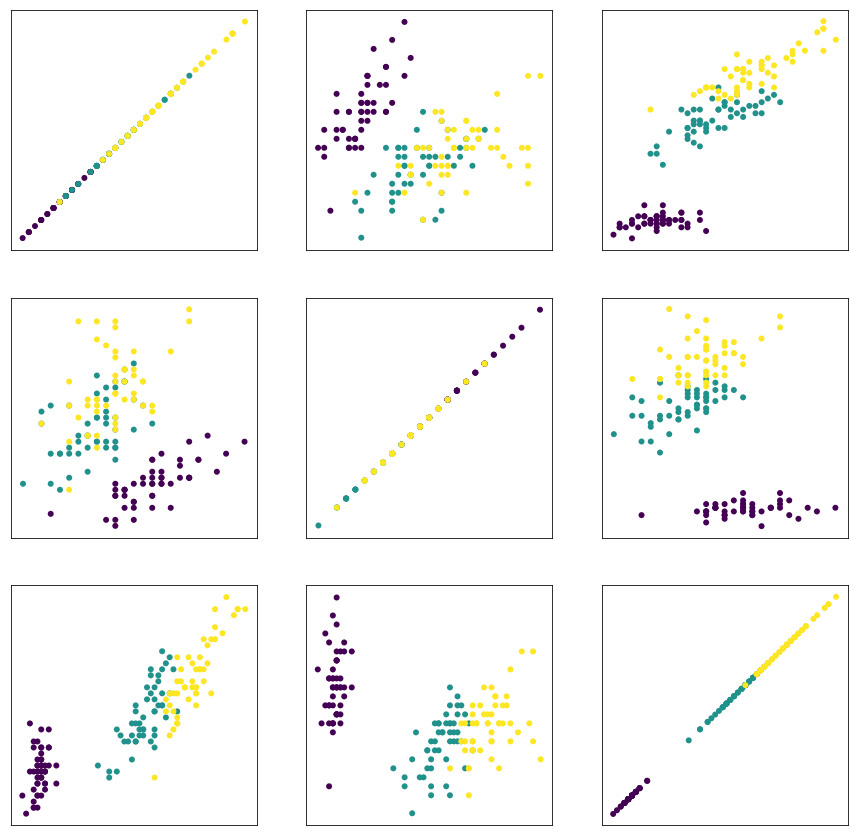

In [37]:
def plot_data(data, dims, groups, centers):
    d = len(dims)
    plt.figure(figsize=(15, 15))
    for i in range(d):
        for j in range(d):
            plt.subplot(d, d, i*d+j+1)
            plt.scatter(data[:, dims[i]], data[:, dims[j]], c=groups, marker='o', lw = 0)
            if(not centers is None):
                plt.scatter(centers[:, dims[i]], centers[:, dims[j]], c="Black", marker='o', lw = 1)
            plt.xticks([]) 
            plt.yticks([])
    plt.show()
    
def compClustersToTargets(k, clusters, targets):
    c=[None]*k
    for i in range(k):
        c[i] = Counter(targets[assign==i])
    print 'Appearances of class i in particular cluster: ', c
    print 'Appearances of class i in dataset: ', Counter(targets)
def k_means(K, data, it, times):
    N=data.shape[0]
    currerr=np.inf
    for i in range(times):
        initialArgs = np.random.choice(N, (K,), replace=False)
        centers = data[initialArgs, :]
        oldErr = np.inf

        for i in range(it):
            distM = dist.cdist(centers, data)
            assign = np.argmin(distM, axis=0)
            for k in range(K):
                centers[k] = data[assign==k].mean(axis=0)
            err = np.sum(((centers[assign]-data)**2))
            if(oldErr<err):
                break
            oldErr = err
        if(err<currerr):
            curr_assign=assign
            curr_centers=centers
    return curr_assign, curr_centers
    
plot_data(data, range(3), iris.target, None)

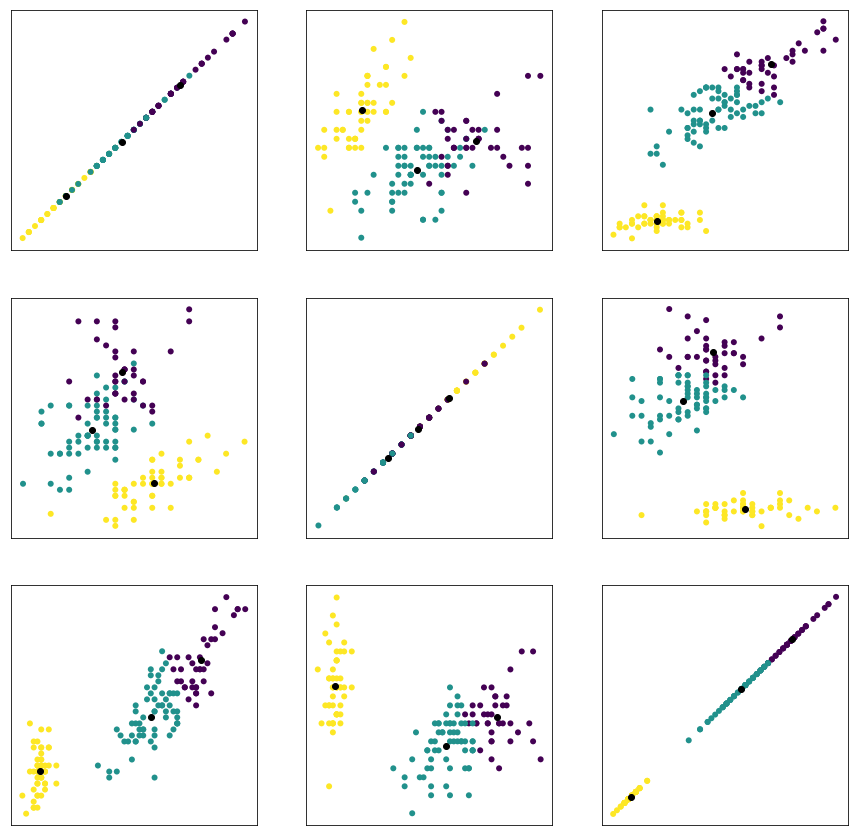

Appearances of class i in particular cluster:  [Counter({2: 36, 1: 2}), Counter({1: 48, 2: 14}), Counter({0: 50})]
Appearances of class i in dataset:  Counter({0: 50, 1: 50, 2: 50})
None


In [80]:
assign, centers = k_means(3, data, 10000)
plot_data(data, range(3), assign, centers)
print compClustersToTargets(3, assign, iris.target)

# Wine dataset

In [12]:
wine = np.array(pandas.read_csv('data/wine/wine.data', sep=',', header=None))
wine_target = wine[:, 0]
wine_data = wine[:, 1:13]
print wine_data
print wine_data.shape

[[ 14.23   1.71   2.43 ...,   5.64   1.04   3.92]
 [ 13.2    1.78   2.14 ...,   4.38   1.05   3.4 ]
 [ 13.16   2.36   2.67 ...,   5.68   1.03   3.17]
 ..., 
 [ 13.27   4.28   2.26 ...,  10.2    0.59   1.56]
 [ 13.17   2.59   2.37 ...,   9.3    0.6    1.62]
 [ 14.13   4.1    2.74 ...,   9.2    0.61   1.6 ]]
(178, 12)


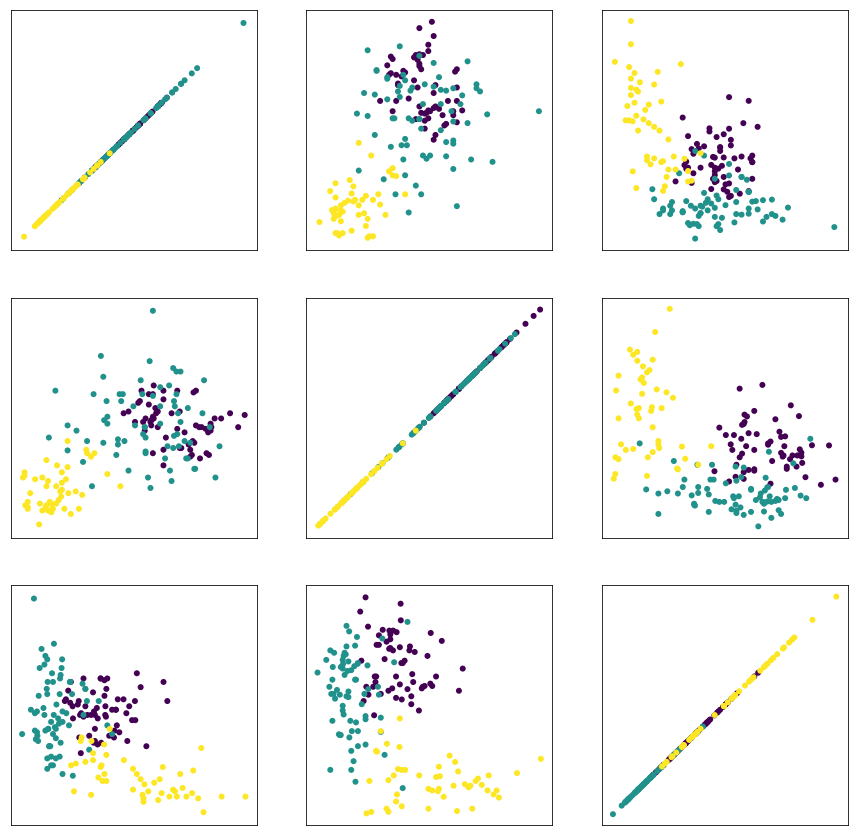

In [77]:
plot_data(wine_data, [10, 11, 9], wine_target, None)

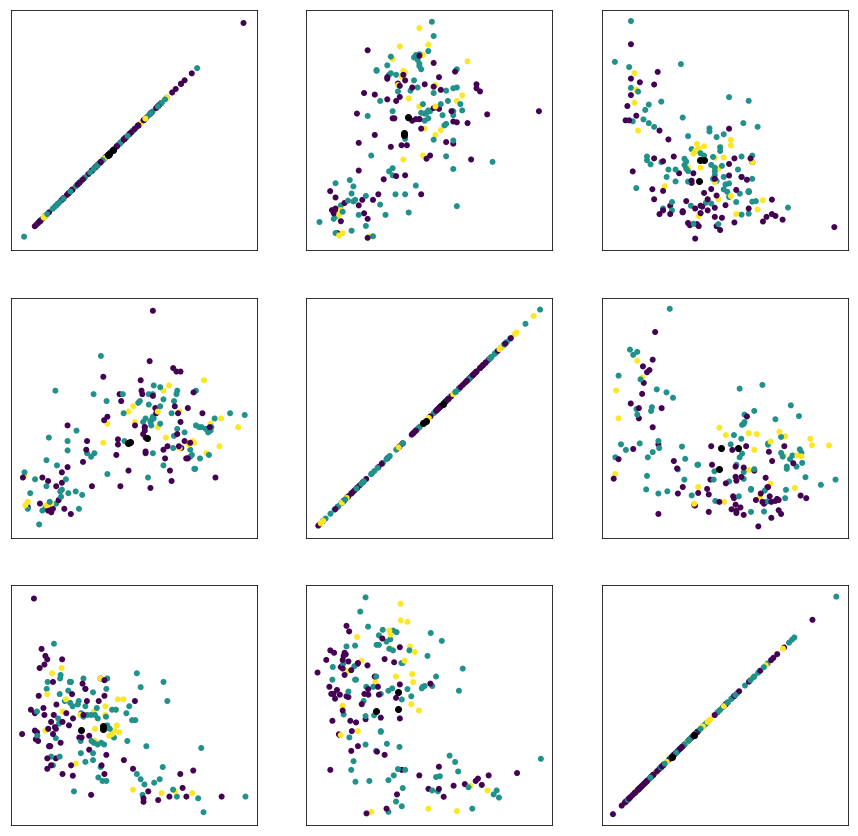

Appearances of class i in particular cluster:  [Counter({2.0: 46, 3.0: 18, 1.0: 7}), Counter({1.0: 37, 3.0: 25, 2.0: 19}), Counter({1.0: 15, 2.0: 6, 3.0: 5})]
Appearances of class i in dataset:  Counter({2.0: 71, 1.0: 59, 3.0: 48})
None


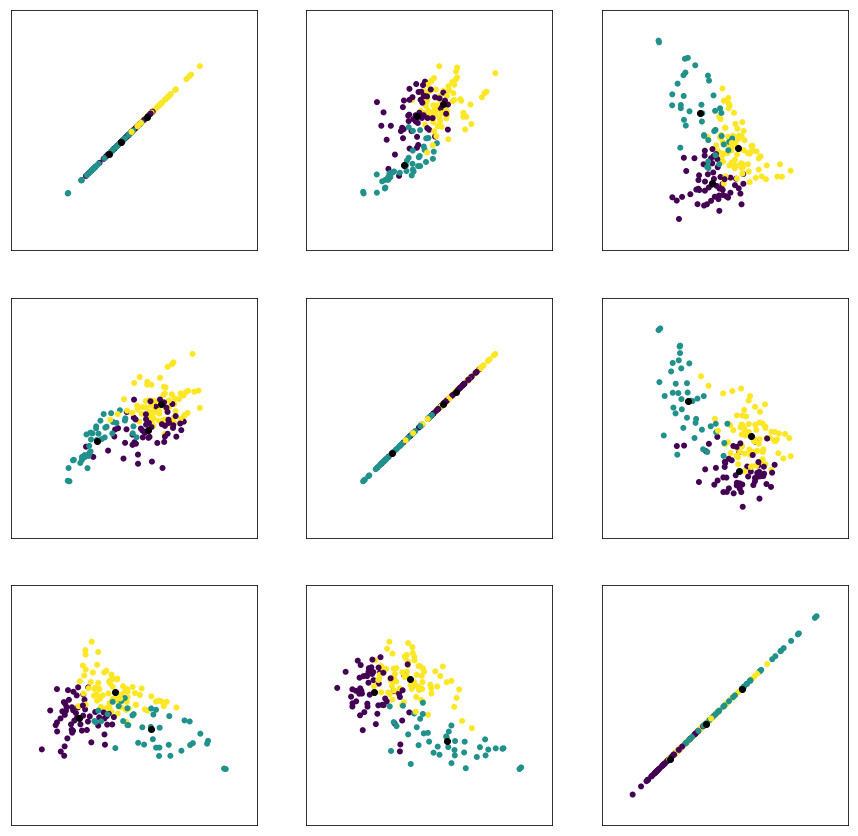

Appearances of class i in particular cluster:  [Counter({2.0: 48, 1.0: 5, 3.0: 3}), Counter({3.0: 40, 2.0: 1}), Counter({1.0: 54, 2.0: 22, 3.0: 5})]
Appearances of class i in dataset:  Counter({2.0: 71, 1.0: 59, 3.0: 48})
None


In [39]:
assign, centers = k_means(3, wine_data, 300, 10)
plot_data(wine_data, [10, 11, 9], assign, centers)
print compClustersToTargets(3, assign, wine_target)
normData = (wine_data - wine_data.mean(axis=1, keepdims=True)) / (wine_data.max(axis=1, keepdims=True) - wine_data.min(axis=1, keepdims=True))
# kmeans = KMeans(3, init='random').fit(normData)
# assign = kmeans.labels_
# centers = kmeans.cluster_centers_
assign, centers = k_means(3, normData, 300, 10)
plot_data(normData, [10, 11, 9], assign, centers)
print compClustersToTargets(3, assign, wine_target)


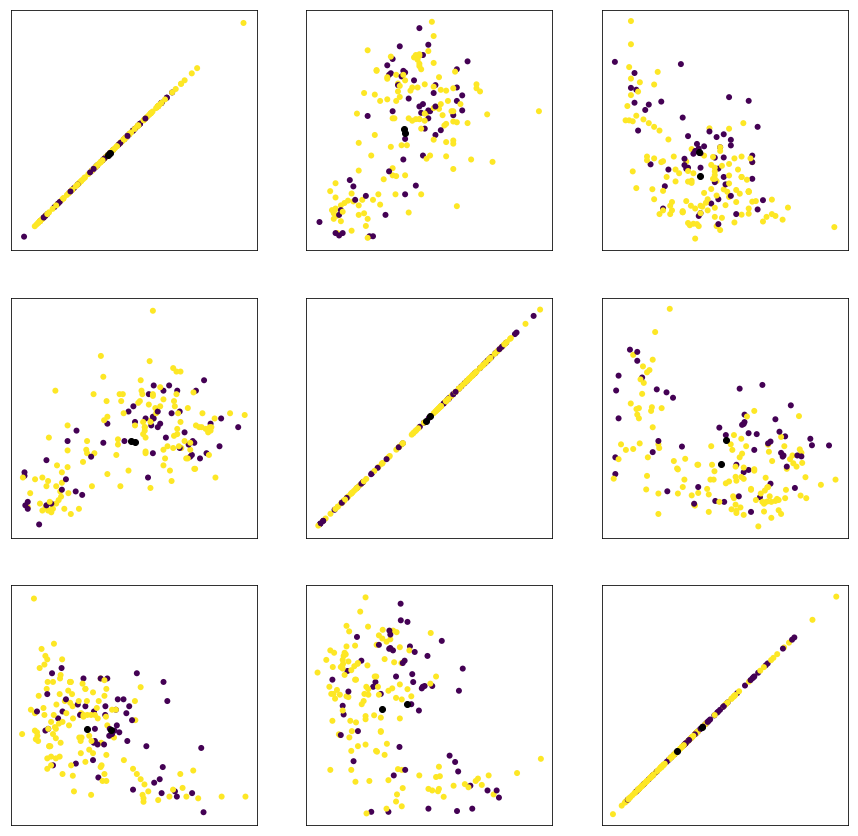

Appearances of class i in particular cluster:  [Counter({1.0: 29, 3.0: 15, 2.0: 10}), Counter({2.0: 61, 3.0: 33, 1.0: 30})]
Appearances of class i in dataset:  Counter({2.0: 71, 1.0: 59, 3.0: 48})
None


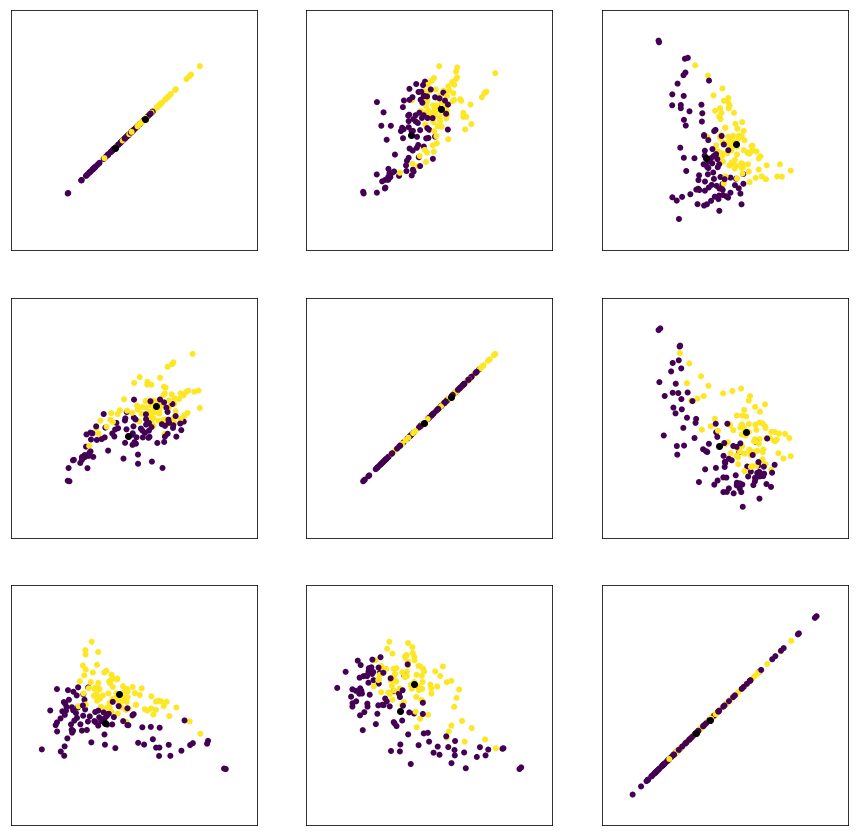

Appearances of class i in particular cluster:  [Counter({2.0: 49, 3.0: 35, 1.0: 5}), Counter({1.0: 54, 2.0: 22, 3.0: 13})]
Appearances of class i in dataset:  Counter({2.0: 71, 1.0: 59, 3.0: 48})
None


In [91]:
assign, centers = k_means(2, wine_data, 10000)
plot_data(wine_data, [10, 11, 9], assign, centers)
print compClustersToTargets(2, assign, wine_target)

normData = (wine_data - wine_data.mean(axis=1, keepdims=True)) / (wine_data.max(axis=1, keepdims=True) - wine_data.min(axis=1, keepdims=True))
assign, centers = k_means(2, normData, 10000)
plot_data(normData, [10, 11, 9], assign, centers)
print compClustersToTargets(2, assign, wine_target)

# Cancer data

In [136]:
cancer = np.array(pandas.read_csv('data/cancer/wdbc.data', sep=',', header=None))
cancer_target = cancer[:, 1]
cancer_data = cancer[:, 2:32]
print cancer_data
print cancer_data.shape

[[17.99 10.38 122.8 ..., 0.2654 0.4601 0.1189]
 [20.57 17.77 132.9 ..., 0.18600000000000003 0.275 0.08902]
 [19.69 21.25 130.0 ..., 0.243 0.3613 0.08757999999999999]
 ..., 
 [16.6 28.08 108.3 ..., 0.1418 0.2218 0.0782]
 [20.6 29.33 140.1 ..., 0.265 0.4087 0.124]
 [7.76 24.54 47.92 ..., 0.0 0.2871 0.07039]]
(569, 30)


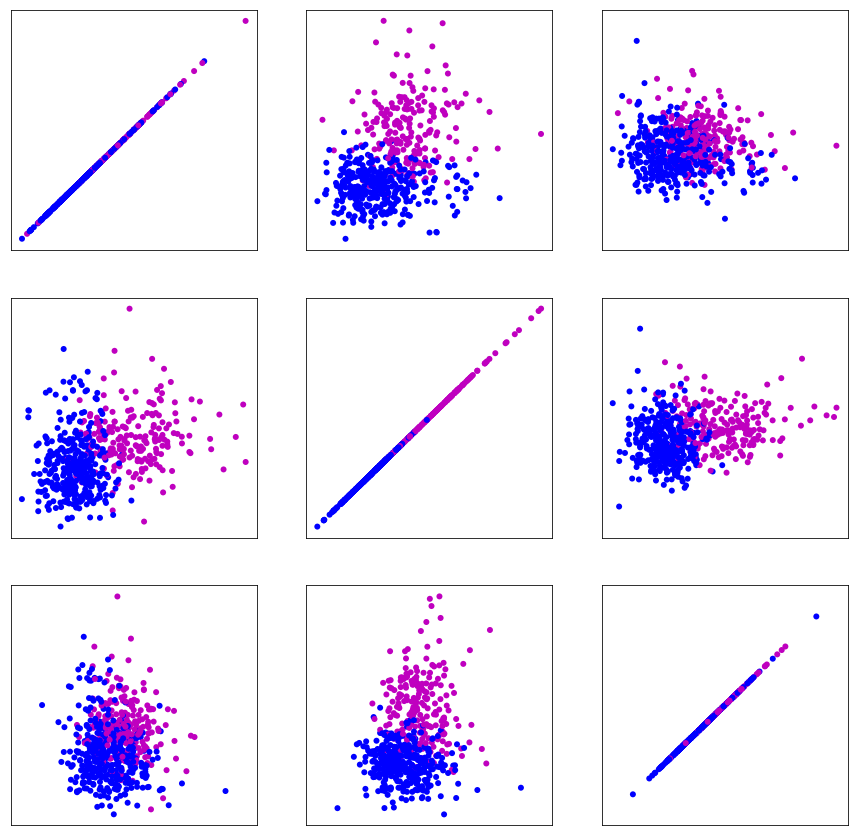

In [139]:
plot_data(cancer_data, [1, 2, 4], cancer_target, None)

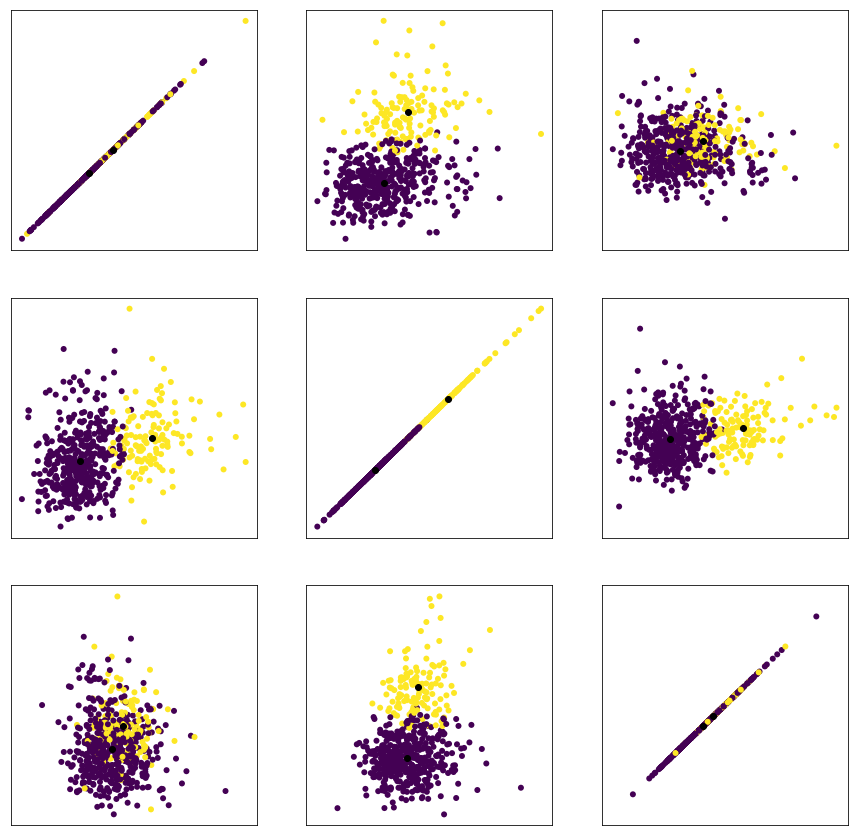

Appearances of class i in particular cluster:  [Counter({'B': 356, 'M': 82}), Counter({'M': 130, 'B': 1})]
Appearances of class i in dataset:  Counter({'B': 357, 'M': 212})
None


In [140]:
assign, centers = k_means(2, cancer_data, 10000)
plot_data(cancer_data, [1, 2, 4], assign, centers)
print compClustersToTargets(2, assign, cancer_target)

# customer dataset

In [158]:
cust = np.array(pandas.read_csv('data/Wholesale customers data.csv', sep=',', header=None))
cust_target = cust[1:, 1]
cust_data = np.array(cust[1:, 2:8], dtype='int')
print cust_data
print cust_data.shape

[[12669  9656  7561   214  2674  1338]
 [ 7057  9810  9568  1762  3293  1776]
 [ 6353  8808  7684  2405  3516  7844]
 ..., 
 [14531 15488 30243   437 14841  1867]
 [10290  1981  2232  1038   168  2125]
 [ 2787  1698  2510    65   477    52]]
(440, 6)


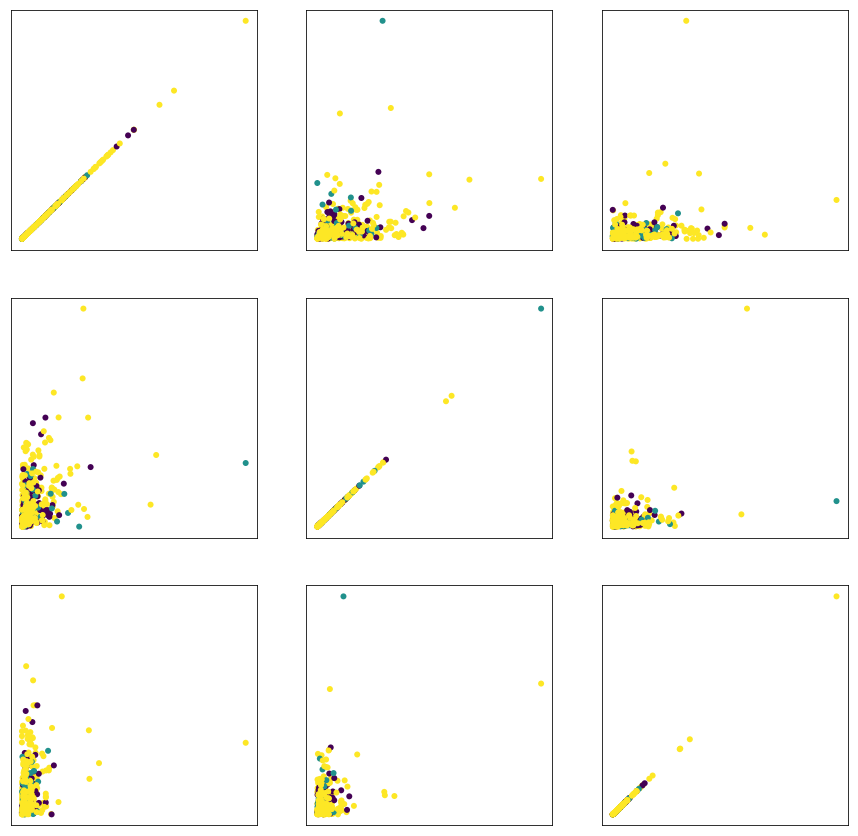

In [160]:
plot_data(cust_data, [0, 3, 5], cust_target, None)

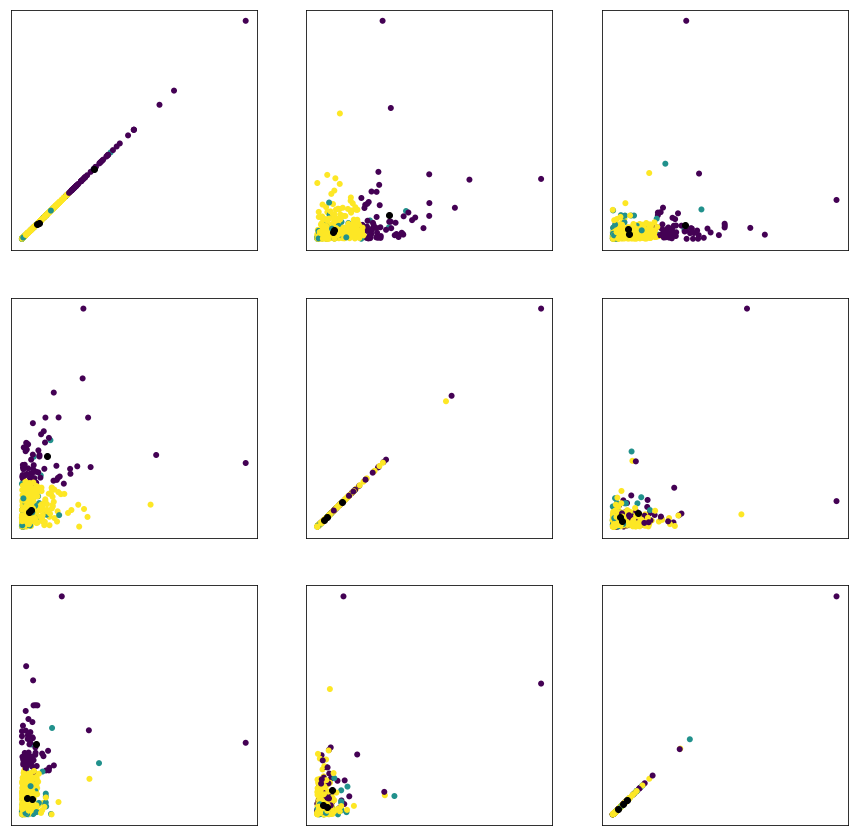

Appearances of class i in particular cluster:  [Counter({'3': 45, '1': 10, '2': 4}), Counter({'3': 35, '1': 10, '2': 8}), Counter({'3': 236, '1': 57, '2': 35})]
Appearances of class i in dataset:  Counter({'3': 316, '1': 77, '2': 47})
None


In [164]:
assign, centers = k_means(3, cust_data, 10000)
plot_data(cust_data, [0, 3, 5], assign, centers)
print compClustersToTargets(3, assign, cust_target)

In [5]:
def scale_mat(mat, lower=0., upper=1.):
    """
    Scale all linearly all elements in a mtrix into a given range.
    """
    ret = mat - np.min(mat)
    return ret * ((upper-lower) / np.max(ret)) + lower

def plot_mat(mat, scaleIndividual=True, colorbar=False, prop=(9,16), gutters=2,
             scale_fun=scale_mat, **kwargs):

    nSamples, nChannels, r, c = mat.shape
    gr, gc =  get_grid(nSamples, (prop[0]*c, prop[1]*r))
    toPlot = np.zeros((int(gr*r+(gr-1)*gutters), int(gc*c + (gc-1)*gutters), nChannels) ) + np.NaN
    for s in xrange(nSamples):
        pr = s // gc
        pc = s - (pr*gc)
        small_img = mat[s,:,:,:].transpose(1,2,0)
        if scaleIndividual:
            small_img = scale_fun(small_img)
        toPlot[int(pr*(r+gutters)):int(pr*(r+gutters)+r),
               int(pc*(c+gutters)):int(pc*(c+gutters)+c),:] = small_img
    if nChannels==1:
        pyplot.imshow(toPlot[:,:,0], interpolation='nearest', **kwargs)
    else:
        pyplot.imshow(toPlot, interpolation='nearest', **kwargs)
    if colorbar:
        pyplot.colorbar()
    pyplot.axis('off')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(55000, 784)


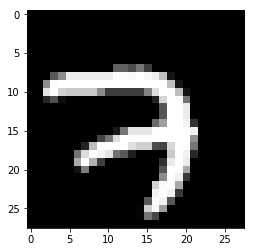

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist_data = mnist.train.images
print mnist.train.images
print mnist_data.shape
plt.imshow(mnist_data[0, :].reshape(28, 28), cmap='gray')
plt.show()

In [42]:
assign, centers = k_means(10, mnist_data, 300, 1)
#plot_data(mnist_data, [0, 3, 5], assign, centers)
#print compClustersToTargets(10, assign, list(mnist.train.labels))

In [6]:
print assign

NameError: name 'assign' is not defined

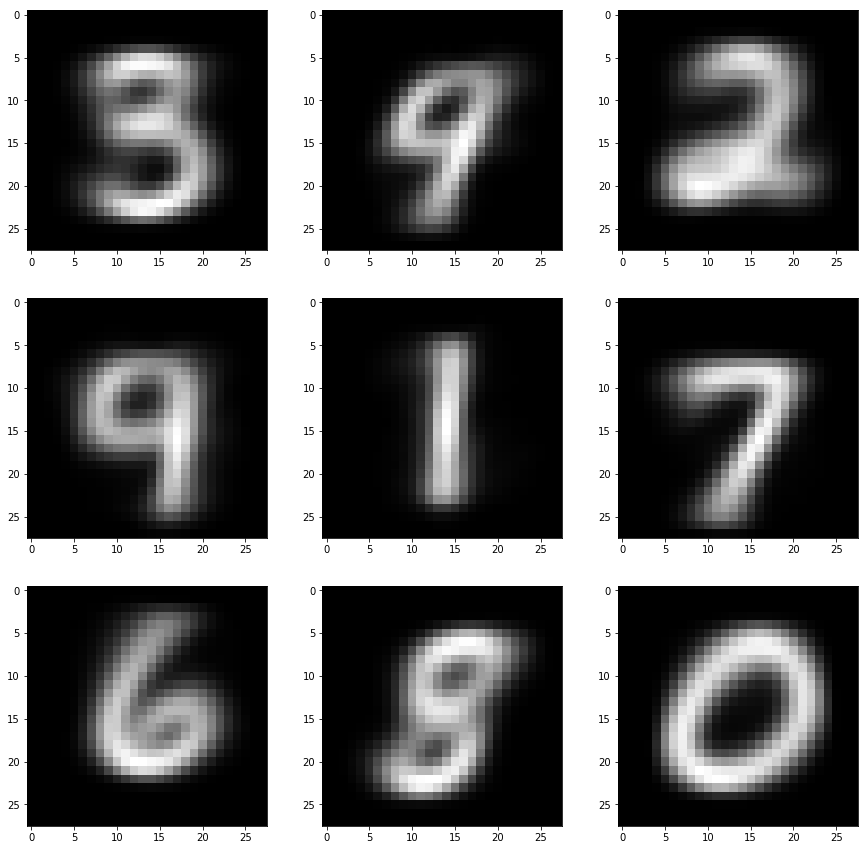

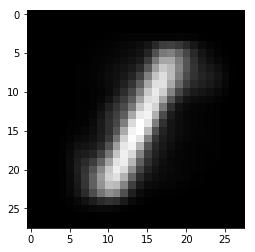

In [41]:
d=3
plt.figure(figsize=(15, 15))

for i in range(d):
    for j in range(d):
        plt.subplot(d, d, i*d+j+1)
        if(i*d+j+1<10):
            plt.imshow(centers[i*d+j+1].reshape(28, 28), cmap='gray')
plt.figure(2)
plt.imshow(centers[0].reshape(28, 28), cmap='gray')
            
plt.show()